In [46]:
import pandas as pd 
import numpy as np
import sklearn 
from sklearn.preprocessing import OneHotEncoder 

In [47]:
#!pip install pyarrow

In [48]:
# Extracting the import data links 
yellow_jan = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
yellow_feb = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet" 

In [49]:
#Reading in the data 

jan_data = pd.read_parquet(yellow_jan)
feb_data = pd.read_parquet(yellow_feb)

In [50]:
#Previewing the read data 
jan_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [51]:
#Extracting duration information 
jan_data['duration'] = (jan_data['tpep_dropoff_datetime'] - jan_data['tpep_pickup_datetime']).dt.total_seconds()/60

In [52]:
# the rides vary by 42 minutes
round(np.std(jan_data['duration']), 2) 

42.59

In [53]:
#filtering jan yellow taxi trips data for rides between 1 and 60 
filtered_data = jan_data[np.logical_and(jan_data['duration']>1,jan_data['duration']<60)] 

In [54]:
#Computing the fraction of the data left 
( filtered_data.shape[0] /jan_data.shape[0] )


0.9812062609276352

In [55]:
# One Hot Encoding 

In [56]:
filtered_data['PULocationID'] = filtered_data['PULocationID'].astype('str') 
filtered_data['DOLocationID'] = filtered_data['DOLocationID'].astype('str') 


/tmp/ipykernel_2321/2112341353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PULocationID'] = filtered_data['PULocationID'].astype('str')
/tmp/ipykernel_2321/2112341353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DOLocationID'] = filtered_data['DOLocationID'].astype('str')


In [57]:
filtered_data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [58]:
from sklearn.feature_extraction import  DictVectorizer

In [59]:
filtered_data.columns 

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [60]:
train_dicts = filtered_data[['PULocationID','DOLocationID']].to_dict(orient ='records')
dv = DictVectorizer()

In [61]:
X_train = dv.fit_transform(train_dicts)

In [62]:
X_train.shape

(3009130, 515)

In [63]:
y_train = filtered_data['duration'].values

In [64]:
y_train.shape

(3009130,)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
model.fit( X_train , y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_train)

In [69]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [70]:
y_pred

array([11.52756477, 10.8979128 , 11.32572075, ..., 11.73808022,
       12.70503857, 11.54119831])

In [87]:
rmse_train = mean_squared_error(y_train, y_pred, squared = False)

In [88]:
print(rmse_train)

7.648541538927101


In [71]:
import seaborn as sns 

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

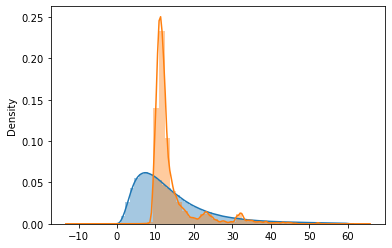

In [72]:
sns.distplot(y_train, label = 'actual')
sns.distplot(y_pred, label = 'predicted')


In [73]:
# Predicting on unseen data 
#Applying the same preprocessing steps 
feb_data['duration'] = (feb_data['tpep_dropoff_datetime'] - feb_data['tpep_pickup_datetime']).dt.total_seconds()/60

feb_filtered_data = feb_data[np.logical_and(feb_data['duration']>1,feb_data['duration']<60)]

feb_filtered_data['PULocationID'] = feb_filtered_data['PULocationID'].astype('str')

feb_filtered_data['DOLocationID'] = feb_filtered_data['DOLocationID'].astype('str')

feb_train = feb_filtered_data[['PULocationID','DOLocationID']].to_dict(orient = 'records')

feb_actual = feb_filtered_data.duration.values

feb_predict = dv.transform(feb_train)




/tmp/ipykernel_2321/974256564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_filtered_data['PULocationID'] = feb_filtered_data['PULocationID'].astype('str')
/tmp/ipykernel_2321/974256564.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_filtered_data['DOLocationID'] = feb_filtered_data['DOLocationID'].astype('str')


In [76]:
def  prep_data(data, transformer): 
    
    """
    This function transforms a new dataset for prediction.
    It creates a new column 
    removes invalid values , does data type conversions and transforms the data
    based on the dict vectorizer. 
    
    """
    data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()/60

    filtered_data = data[np.logical_and(data['duration']>1,data['duration']<60)]

    filtered_data['PULocationID'] = filtered_data['PULocationID'].astype('str')

    filtered_data['DOLocationID'] = filtered_data['DOLocationID'].astype('str')

    train_dicts = filtered_data[['PULocationID','DOLocationID']].to_dict(orient = 'records')

    actual_duration = feb_filtered_data.duration.values
    
    return transformer.transform(train_dicts) , actual_duration

In [77]:
feb_predicted , feb_actual  = prep_data(feb_data , dv)

/tmp/ipykernel_2321/3144171000.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PULocationID'] = filtered_data['PULocationID'].astype('str')
/tmp/ipykernel_2321/3144171000.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DOLocationID'] = filtered_data['DOLocationID'].astype('str')


In [80]:
len(feb_actual)

2855879

In [81]:
feb_duration = model.predict(feb_predict)

In [82]:
from sklearn.metrics import mean_squared_error  

In [89]:
rmse_pred = mean_squared_error(feb_duration, feb_actual, squared = False)

In [90]:
print(rmse_pred)

7.810133646377446
